In [103]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import gc
from scipy.stats import chi2
import seaborn as sns
from scipy import signal

In [3]:
Deep_Cove = np.loadtxt('DeepCove_temperature_2019.dat')
#first point = start 
#second point = end
#3rd point = num of points
t_start = int(Deep_Cove[0])
t_end   = int(Deep_Cove[1])
Num_pts = int(Deep_Cove[2])
#create linspace. Remove first 3 points --> not data!
tt = np.linspace(t_start,t_end,Num_pts)
Deep_Cove = Deep_Cove[3:]

In [4]:
Discovery = np.loadtxt('DiscoveryElementary_temperature_2019.dat')
Discovery = Discovery[3:]

Helgesen = np.loadtxt('Helgesen_temperature_2019.dat')
Helgesen = Helgesen[3:]

James_Bay= np.loadtxt('JamesBay_temperature_2019.dat')
James_Bay = James_Bay[3:]

John = np.loadtxt('JohnMuir_temperature_2019.dat')
John = John[3:]

Keating = np.loadtxt('Keating_temperature_2019.dat')
Keating = Keating[3:]

UVicSci = np.loadtxt('UVicSci_temperature_2019.dat')
UVicSci = UVicSci[3:]

In [5]:
offset = datetime(1970, 1, 1).toordinal() + 366  
good_timestamp = pd.to_datetime(tt - offset, unit='D')

In [7]:
Minute_Data  = {'Deep Cove': Deep_Cove, 'Discovery': Discovery, 'Helgesen': Helgesen, 
                'James Bay': James_Bay, 'John Muir': John, 'Keating':Keating, 'UVicSci': UVicSci}
indices  =  good_timestamp

min_data = pd.DataFrame(Minute_Data, index = indices)

In [8]:
min_data

In [9]:
min_data.interpolate(method='linear',inplace=True)

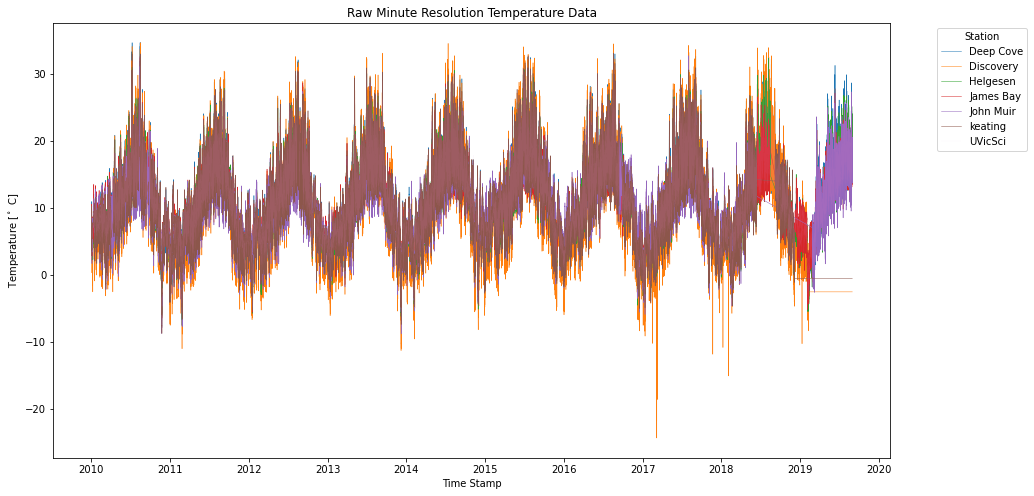

In [54]:
fig1 = plt.figure(figsize=(15,8))

plt.plot(min_data['Deep Cove'], linewidth = 0.5, label = 'Deep Cove')
plt.plot(min_data['Discovery'], linewidth = 0.5, label = 'Discovery')
plt.plot(min_data['Helgesen'], linewidth = 0.5, label = 'Helgesen')
plt.plot(min_data['James Bay'], linewidth = 0.5, label = 'James Bay')
plt.plot(min_data['John Muir'], linewidth = 0.5, label = 'John Muir')
plt.plot(min_data['Keating'], linewidth = 0.5, label = 'keating')
plt.plot(min_data['UVicSci'], linewidth = 0.1, label = 'UVicSci',alpha = 0.2)
plt.xlabel('Time Stamp')
plt.ylabel('Temperature [${^\circ}$ C]')
plt.title('Raw Minute Resolution Temperature Data')
plt.legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('Minute_Resoltuion_raw.png')
plt.style.use('seaborn-dark')
plt.show()

In [10]:
mean_DeepCove = np.mean(min_data['Deep Cove'])
mean_Discovery = np.mean(min_data['Discovery'])
mean_Helgesen = np.mean(min_data['Helgesen'])
mean_JamesBay = np.mean(min_data['James Bay'])
mean_JohnMuir = np.mean(min_data['John Muir'])
mean_Keating = np.mean(min_data['Keating'])
mean_UVic = np.mean(min_data['UVicSci'])

std_DeepCove = np.std(min_data['Deep Cove'])
std_Discovery = np.std(min_data['Discovery'])
std_Helgesen = np.std(min_data['Helgesen'])
std_JamesBay = np.std(min_data['James Bay'])
std_JohnMuir = np.std(min_data['John Muir'])
std_Keating = np.std(min_data['Keating'])
std_Uvic = np.std(min_data['UVicSci'])

In [11]:
n_DeepCove = (min_data['Deep Cove'] - mean_DeepCove) / std_DeepCove
n_Discovery = (min_data['Discovery'] - mean_Discovery) / std_Discovery
n_Helgesen = (min_data['Helgesen'] - mean_Helgesen) / std_Helgesen
n_JamesBay = (min_data['James Bay'] - mean_JamesBay) / std_JamesBay
n_JohnMuir = (min_data['John Muir'] - mean_JohnMuir) / std_JohnMuir
n_keating = (min_data['Keating'] - mean_Keating) / std_Keating
n_Uvic = (min_data['UVicSci'] - mean_UVic) / std_Uvic

In [12]:
gc.collect()

40

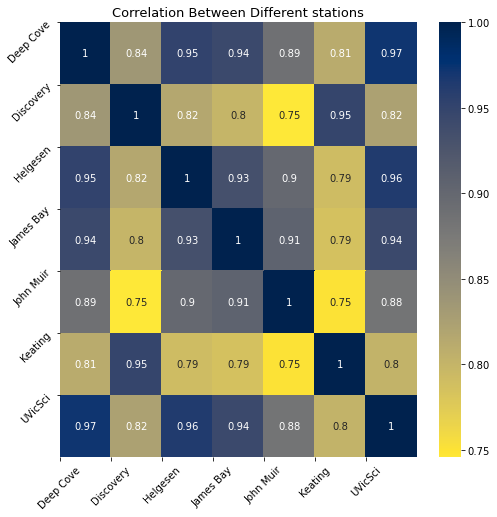

In [25]:
fig2 = plt.figure(figsize=(8,8))
ax = fig2.add_subplot(111)
sns.heatmap(corr, annot=True, cmap=plt.cm.cividis_r)
ticks = np.arange(0,len(min_data.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=45)
plt.yticks(rotation=45)
ax.set_yticks(ticks)
ax.set_xticklabels(min_data.columns)
ax.set_yticklabels(min_data.columns)
plt.title('Correlation Between Different stations', fontsize = 13)
plt.savefig("CrossCorr_HeatMap.png")
plt.show()

In [27]:
data_2010 = min_data.loc['2010-01-01 00:00:00':'2011-01-01 00:00:00']
data_2011 = min_data.loc['2011-01-01 00:00:00':'2012-01-01 00:00:00']
data_2012 = min_data.loc['2012-01-01 00:00:00':'2013-01-01 00:00:00']
data_2013 = min_data.loc['2013-01-01 00:00:00':'2014-01-01 00:00:00']
data_2014 = min_data.loc['2014-01-01 00:00:00':'2015-01-01 00:00:00']
data_2015 = min_data.loc['2015-01-01 00:00:00':'2016-01-01 00:00:00']
data_2016 = min_data.loc['2016-01-01 00:00:00':'2017-01-01 00:00:00']
data_2017 = min_data.loc['2017-01-01 00:00:00':'2018-01-01 00:00:00']
data_2018 = min_data.loc['2018-01-01 00:00:00':'2019-01-01 00:00:00']
data_2019 = min_data.loc['2019-01-01 00:00:00':'2019-08-31 00:00:00']

DC_means = [np.mean(data_2010['Deep Cove']), np.mean(data_2011['Deep Cove']), np.mean(data_2012['Deep Cove']), np.mean(data_2013['Deep Cove']),
           np.mean(data_2014['Deep Cove']), np.mean(data_2015['Deep Cove']), np.mean(data_2016['Deep Cove']), np.mean(data_2017['Deep Cove']),
           np.mean(data_2018['Deep Cove']), np.mean(data_2019['Deep Cove'])]

Discovery_means = [np.mean(data_2010['Discovery']), np.mean(data_2011['Discovery']), np.mean(data_2012['Discovery']), np.mean(data_2013['Discovery']),
           np.mean(data_2014['Discovery']), np.mean(data_2015['Discovery']), np.mean(data_2016['Discovery']), np.mean(data_2017['Discovery']),
           np.mean(data_2018['Discovery']), np.mean(data_2019['Discovery'])]

Helgesen_means = [np.mean(data_2010['Helgesen']), np.mean(data_2011['Helgesen']), np.mean(data_2012['Helgesen']), np.mean(data_2013['Helgesen']),
           np.mean(data_2014['Helgesen']), np.mean(data_2015['Helgesen']), np.mean(data_2016['Helgesen']), np.mean(data_2017['Helgesen']),
           np.mean(data_2018['Helgesen']), np.mean(data_2019['Helgesen'])]

JB_means = [np.mean(data_2010['James Bay']), np.mean(data_2011['James Bay']), np.mean(data_2012['James Bay']), np.mean(data_2013['James Bay']),
           np.mean(data_2014['James Bay']), np.mean(data_2015['James Bay']), np.mean(data_2016['James Bay']), np.mean(data_2017['James Bay']),
           np.mean(data_2018['James Bay']), np.mean(data_2019['James Bay'])]

John_means = [np.mean(data_2010['John Muir']), np.mean(data_2011['John Muir']), np.mean(data_2012['John Muir']), np.mean(data_2013['John Muir']),
           np.mean(data_2014['John Muir']), np.mean(data_2015['John Muir']), np.mean(data_2016['John Muir']), np.mean(data_2017['John Muir']),
           np.mean(data_2018['John Muir']), np.mean(data_2019['John Muir'])]

Keating_means = [np.mean(data_2010['Keating']), np.mean(data_2011['Keating']), np.mean(data_2012['Keating']), np.mean(data_2013['Keating']),
           np.mean(data_2014['Keating']), np.mean(data_2015['Keating']), np.mean(data_2016['Keating']), np.mean(data_2017['Keating']),
           np.mean(data_2018['Keating']), np.mean(data_2019['Keating'])]

UVic_means = [np.mean(data_2010['UVicSci']), np.mean(data_2011['UVicSci']), np.mean(data_2012['UVicSci']), np.mean(data_2013['UVicSci']),
           np.mean(data_2014['UVicSci']), np.mean(data_2015['UVicSci']), np.mean(data_2016['UVicSci']), np.mean(data_2017['UVicSci']),
           np.mean(data_2018['UVicSci']), np.mean(data_2019['UVicSci'])]

DC_mean        = np.mean(DC_means)
Discovery_mean = np.mean(Discovery_means)
Helgesen_mean  = np.mean(Helgesen_means)
James_Bay_mean = np.mean(JB_means)
John_Muir_mean = np.mean(John_means)
Keating_mean   = np.mean(Keating_means)
UVic_mean      = np.mean(UVic_means)

DC_error        = np.std(DC_means) / 10
Discovery_error = np.std(Discovery_means) / 10
Helgesen_error  = np.std(Helgesen_means) / 10
James_Bay_error = np.std(JB_means) / 10
John_Muir_error = np.std(John_means) / 10
Keating_error   = np.std(Keating_means) / 10
UVic_error      = np.std(UVic_means) / 10

MEANS = [DC_mean, Discovery_mean, Helgesen_mean, James_Bay_mean, John_Muir_mean, Keating_mean, UVic_mean]
ERROR = [DC_error, Discovery_error, Helgesen_error, James_Bay_error, John_Muir_error, Keating_error, UVic_error]

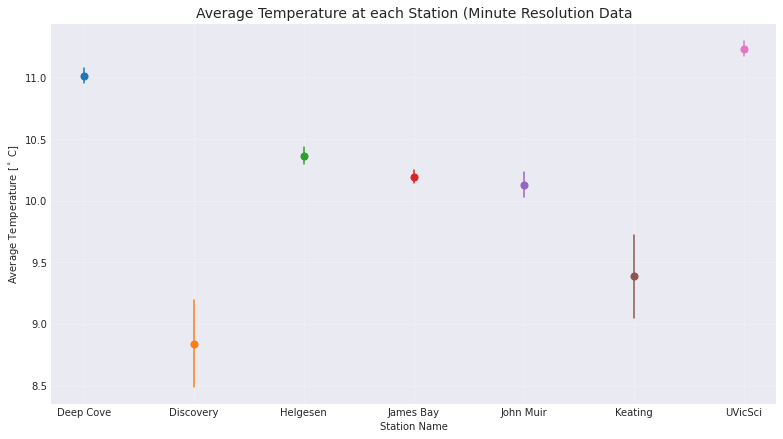

In [56]:
x_pts = np.arange(0,7,1)
stn_names = ['Deep Cove', 'Discovery', 'Helgesen', 'James Bay', 'John Muir', 'Keating', 'UVicSci']
fig6 = plt.figure(figsize=(13,7))
for i in range(len(x_pts)):
    plt.plot([x_pts[i], x_pts[i]], [MEANS[i] - ERROR[i], MEANS[i] + ERROR[i]])
    plt.scatter(x_pts[i],MEANS[i], s=50)
ticks = np.arange(0,len(min_data.columns),1)
plt.xticks(x_pts, stn_names)
plt.grid(True,alpha=0.25)
#plt.ylim(6.5,14)
plt.xlabel('Station Name')
plt.ylabel('Average Temperature [${^\circ}$ C]')
plt.title('Average Temperature at each Station (Minute Resolution Data',fontsize=14)
plt.savefig('Mean_Temp_stns.png')
plt.style.use('ggplot')
plt.show()

In [29]:
range1 = min_data.loc['2017-06-01 00:00:00':'2017-10-01 00:00:00']
range2 = min_data.loc['2016-12-01 00:00:00':'2017-04-01 00:00:00']

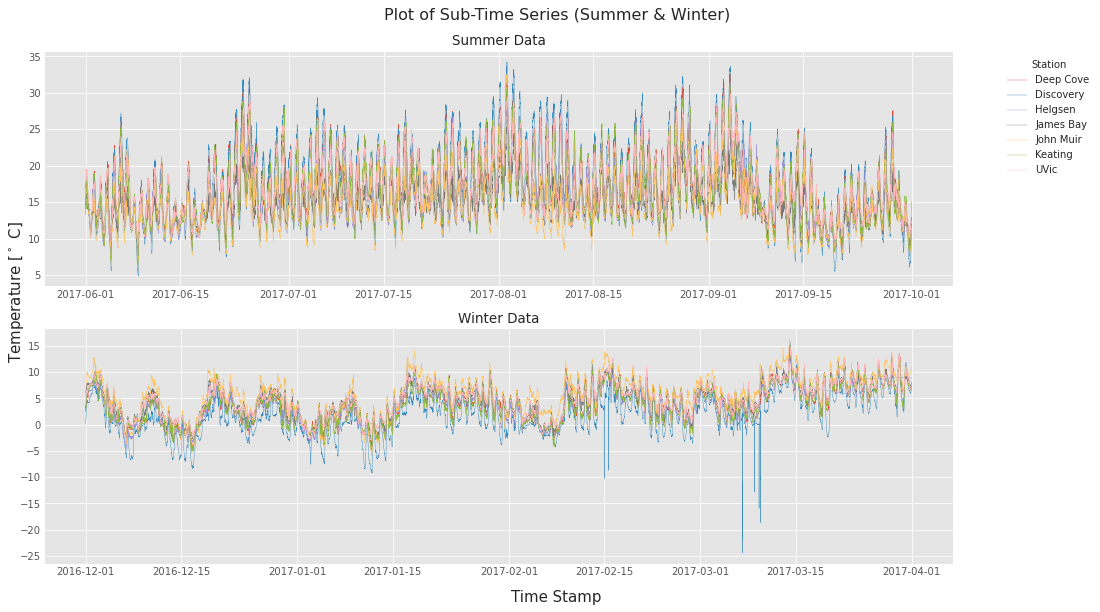

In [57]:
fig3, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,8),constrained_layout=True)
ax[0].plot(range1['Deep Cove'],linewidth=0.4,label='Deep Cove')
ax[0].plot(range1['Discovery'],linewidth=0.4,label='Discovery')
ax[0].plot(range1['Helgesen'],linewidth=0.4,label='Helgsen')
ax[0].plot(range1['James Bay'],linewidth=0.4,label='James Bay')
ax[0].plot(range1['John Muir'],linewidth=0.4,label='John Muir')
ax[0].plot(range1['Keating'],linewidth=0.4,label='Keating')
ax[0].plot(range1['UVicSci'],linewidth=0.4,label='UVic')
ax[0].set_title('Summer Data',fontsize=13.5)
ax[0].legend(title='Station', bbox_to_anchor=(1.05, 1), loc='upper left')

ax[1].plot(range2['Deep Cove'],linewidth=0.4,label='Deep Cove')
ax[1].plot(range2['Discovery'],linewidth=0.4,label='Discovery')
ax[1].plot(range2['Helgesen'],linewidth=0.4,label='Helgsen')
ax[1].plot(range2['James Bay'],linewidth=0.4,label='James Bay')
ax[1].plot(range2['John Muir'],linewidth=0.4,label='John Muir')
ax[1].plot(range2['Keating'],linewidth=0.4,label='Keating')
ax[1].plot(range2['UVicSci'],linewidth=0.4,label='UVic')
ax[1].set_title('Winter Data',fontsize=13.5)
fig3.text(0,0.5, "Temperature [${^\circ}$ C]", ha="center", va="center", rotation=90,fontsize = 15)
fig3.text(0.5,-0.03, "Time Stamp", ha="center", va="center", fontsize=15)
fig3.suptitle('Plot of Sub-Time Series (Summer & Winter)',fontsize=16)
plt.style.use('ggplot')
plt.savefig('SubSeries_winter_and_summer.png')
plt.show()

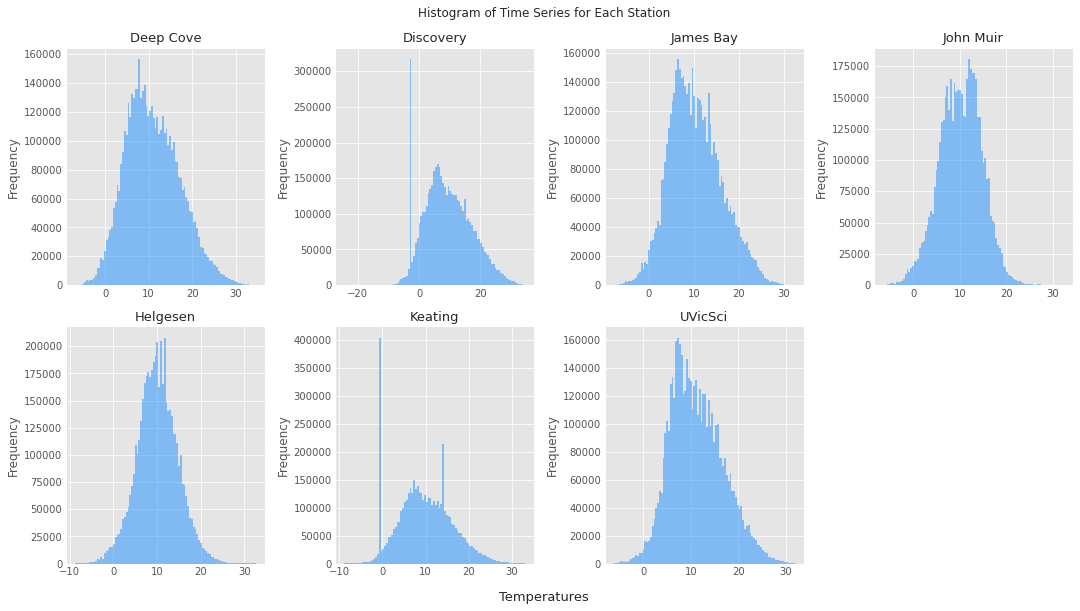

In [60]:
fig4, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,8),constrained_layout=True)

min_data['Deep Cove'].plot.hist(bins=100,alpha=0.5, ax=ax[0][0],color='dodgerblue')
min_data['Discovery'].plot.hist(bins=100,alpha=0.5, ax=ax[0][1],color='dodgerblue')
min_data['Helgesen'].plot.hist(bins=100, alpha=0.5, ax=ax[0][2],color='dodgerblue')
min_data['James Bay'].plot.hist(bins=100, alpha=0.5, ax=ax[0][3],color='dodgerblue')
min_data['John Muir'].plot.hist(bins=100, alpha=0.5, ax=ax[1][0],color='dodgerblue')
min_data['Keating'].plot.hist(bins=100, alpha=0.5, ax=ax[1][1],color='dodgerblue')
min_data['UVicSci'].plot.hist(bins=100, alpha=0.5, ax=ax[1][2],color='dodgerblue')


ax[0][0].set_title('Deep Cove', fontsize=13)
ax[0][1].set_title('Discovery', fontsize=13)
ax[1][0].set_title('Helgesen', fontsize=13)
ax[0][2].set_title('James Bay', fontsize=13)
ax[0][3].set_title('John Muir', fontsize=13)
ax[1][1].set_title('Keating', fontsize=13)
ax[1][2].set_title('UVicSci', fontsize=13)

fig4.text(0.5,-0.03, "Temperatures", ha="center", va="center", fontsize=13)
fig4.suptitle('Histogram of Time Series for Each Station')
plt.style.use('ggplot')
plt.savefig('Histograms.png')
fig4.delaxes(ax[1][3])

/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/envs/datalore-user/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

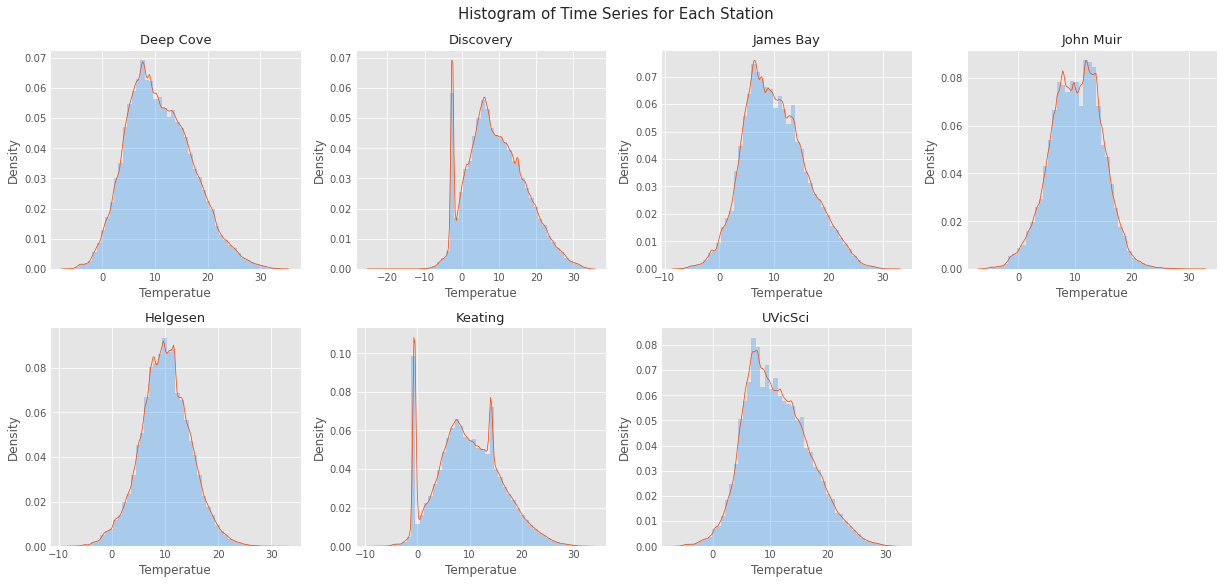

In [89]:
fig10, ax = plt.subplots(nrows=2, ncols=4, figsize=(17,8), constrained_layout=True)

sns.distplot(min_data['Deep Cove'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue", ax=ax[0][0])

sns.distplot(min_data['Discovery'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue",ax=ax[0][1])

sns.distplot(min_data['Helgesen'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue",ax=ax[0][2])

sns.distplot(min_data['James Bay'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue",ax=ax[0][3])

sns.distplot(min_data['John Muir'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue",ax=ax[1][0])

sns.distplot(min_data['Keating'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue",ax=ax[1][1])

sns.distplot(min_data['UVicSci'], kde=True, kde_kws = {"color":"orangered", "lw":"0.75"},
                                    hist_kws= {"color":"dodgerblue", "alpha":0.3}, axlabel="Temperatue",ax=ax[1][2])

ax[0][0].set_title('Deep Cove', fontsize=13)
ax[0][1].set_title('Discovery', fontsize=13)
ax[1][0].set_title('Helgesen', fontsize=13)
ax[0][2].set_title('James Bay', fontsize=13)
ax[0][3].set_title('John Muir', fontsize=13)
ax[1][1].set_title('Keating', fontsize=13)
ax[1][2].set_title('UVicSci', fontsize=13)

fig10.suptitle('Histogram of Time Series for Each Station',fontsize=15)
plt.savefig('HistogramsWithKDE.png')
fig10.delaxes(ax[1][3])
plt.show()

In [32]:
Win = 'hann'
size1 = len(range1)
size2 = len(range2)
num_windows = 8

fs = 1440 # num of mins in day

Nperseg1  = size1 // 8
Nperseg2  = size2 // 8
Noverlap1 = Nperseg1 // 2
Noverlap2 = Nperseg2 // 2
Nfft1     = 2**(15)
Nfft2     = 2**(15)

M   = 2*num_windows - 1
DOF = (4/3)*M
alpha  = 0.05

upper = DOF / chi2.ppf(alpha/2, DOF)
lower = DOF / chi2.ppf((1-alpha/2), DOF)

#range1 PDF

f1_DeepCove, Pxx1_DeepCove = signal.welch(range1['Deep Cove'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')

f1_Discovery, Pxx1_Discovery = signal.welch(range1['Discovery'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')
                                    
f1_helgesen, Pxx1_helgesen = signal.welch(range1['Helgesen'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')

f1_JamesBay, Pxx1_JamesBay = signal.welch(range1['James Bay'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')  

f1_John, Pxx1_John = signal.welch(range1['John Muir'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')  

f1_Keating, Pxx1_Keating = signal.welch(range1['Keating'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')

f1_Uvic, Pxx1_Uvic = signal.welch(range1['UVicSci'], fs, window = Win, nperseg=Nperseg1,
                                           noverlap=Noverlap1, nfft=Nfft1, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')   


#range2 PDF

f2_DeepCove, Pxx2_DeepCove = signal.welch(range2['Deep Cove'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')

f2_Discovery, Pxx2_Discovery = signal.welch(range2['Discovery'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')
                                    
f2_helgesen, Pxx2_helgesen = signal.welch(range2['Helgesen'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')

f2_JamesBay, Pxx2_JamesBay = signal.welch(range2['James Bay'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')  

f2_John, Pxx2_John = signal.welch(range2['John Muir'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')  

f2_Keating, Pxx2_Keating = signal.welch(range2['Keating'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')

f2_Uvic, Pxx2_Uvic = signal.welch(range2['UVicSci'], fs, window = Win, nperseg=Nperseg2,
                                           noverlap=Noverlap2, nfft=Nfft2, detrend='constant',
                                           return_onesided=True, scaling='density', average='mean')                                                                                                                                                                                                                                             

In [33]:
f1   = [f1_DeepCove, f1_Discovery, f1_helgesen, f1_JamesBay, f1_John, f1_Keating, f1_Uvic]
f2   = [f2_DeepCove, f2_Discovery, f2_helgesen, f2_JamesBay, f2_John, f2_Keating, f2_Uvic]
Pxx1 = [Pxx1_DeepCove, Pxx1_Discovery, Pxx1_helgesen, Pxx1_JamesBay, Pxx1_John, Pxx1_Keating, Pxx1_Uvic]
Pxx2 = [Pxx2_DeepCove, Pxx2_Discovery, Pxx2_helgesen, Pxx2_JamesBay, Pxx2_John, Pxx2_Keating, Pxx2_Uvic]

stn_names = ['Deep Cove', 'Discovery', 'Helgesen', 'James Bay', 'John Muir', 'Keating', 'UVicSci']

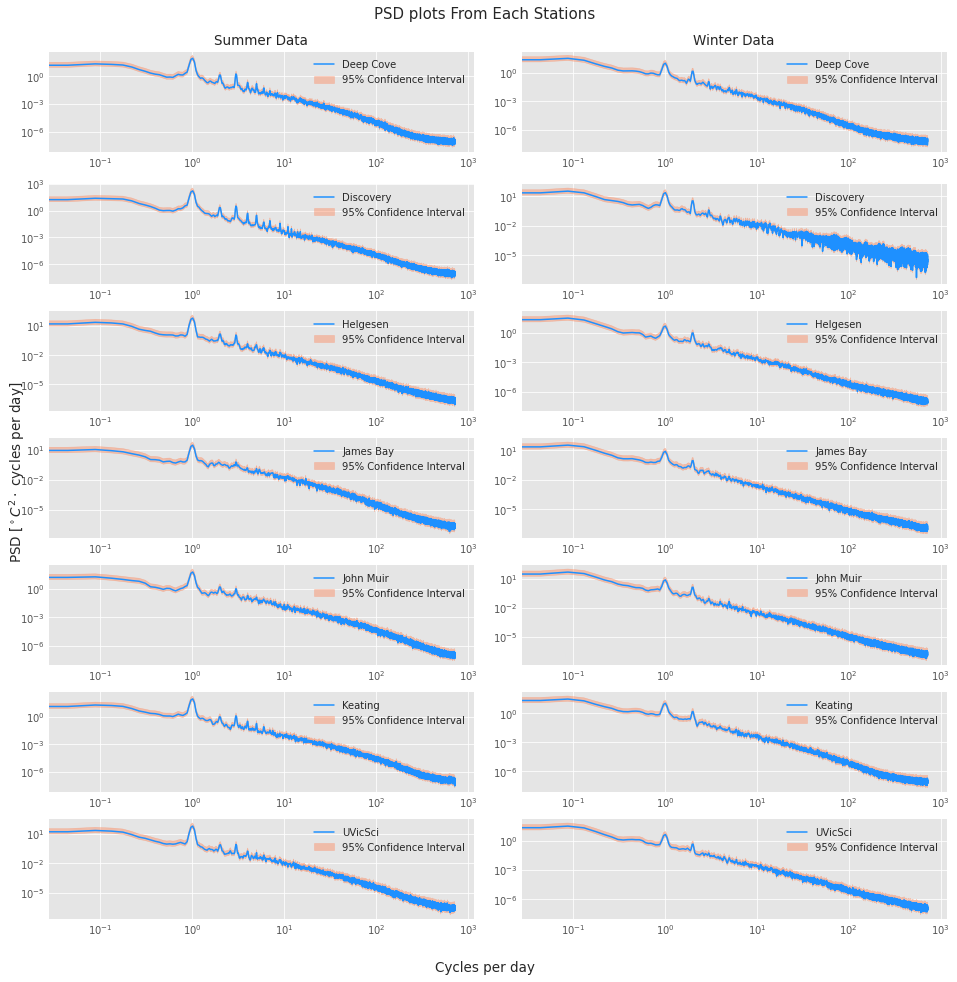

In [90]:
fig5, ax = plt.subplots(nrows=7, ncols=2, figsize=(13,13),constrained_layout=True)

for i in range(len(f1)):
    ax[i][0].loglog(f1[i], Pxx1[i], label=stn_names[i],color='dodgerblue')
    ax[i][1].loglog(f2[i], Pxx2[i], label=stn_names[i],color='dodgerblue')
    ax[i][0].fill_between(f1[i], lower*Pxx1[i], upper*Pxx1[i],color='coral', label ='95% Confidence Interval',alpha = 0.4)
    ax[i][1].fill_between(f2[i], lower*Pxx2[i], upper*Pxx2[i],color='coral',label ='95% Confidence Interval',alpha = 0.4)
    ax[i][0].legend()
    ax[i][1].legend()

ax[0][0].set_title('Summer Data', fontsize=13.5)
ax[0][1].set_title('Winter Data', fontsize=13.5)
fig5.suptitle('PSD plots From Each Stations', fontsize=15)
fig5.text(0,0.5, "PSD [${^\circ C^2 \cdot}$ cycles per day]", ha="center", va="center", rotation=90,fontsize = 13.5)
fig5.text(0.5,-0.03, "Cycles per day", ha="center", va="center", fontsize=13.5)
plt.style.use('ggplot')
plt.savefig('PSDs.png')
plt.show()

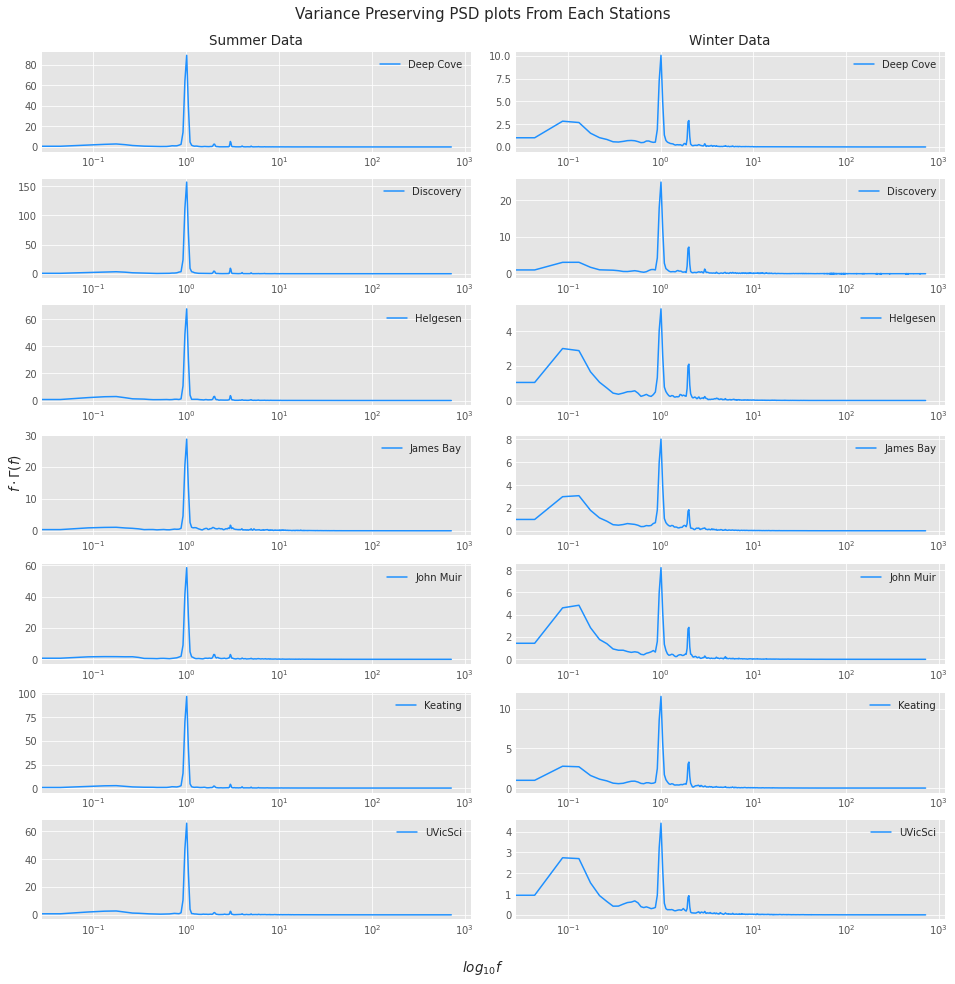

In [91]:
fig7, ax = plt.subplots(nrows=7, ncols=2, figsize=(13,13),constrained_layout=True)

for i in range(len(f1)):
    ax[i][0].semilogx(f1[i], f1[i]*Pxx1[i], label=stn_names[i],color='dodgerblue')
    ax[i][1].semilogx(f2[i], f2[i]*Pxx2[i], label=stn_names[i],color='dodgerblue')
    ax[i][0].legend()
    ax[i][1].legend()

ax[0][0].set_title('Summer Data', fontsize=13.5)
ax[0][1].set_title('Winter Data', fontsize=13.5)
fig7.suptitle('Variance Preserving PSD plots From Each Stations', fontsize=15)
fig7.text(0,0.5, '${f \cdot \Gamma (f)}$ ', ha="center", va="center", rotation=90,fontsize = 13.5)
fig7.text(0.5,-0.03, "${log_{10}f}$", ha="center", va="center", fontsize=13.5)
plt.style.use('ggplot')
plt.savefig('VarPresPSDs.png')
plt.show()

In [102]:
gc.collect()

100194

31113